In [49]:
include("lattice_P.jl")
include("constructor.jl")
include("blockmean.jl")
using PyPlot
M = 100; # number of samples
nmeas = 1024# number of steps
I = (30,30)
β = 0.5; T = 1.0/β; L=prod(I)
h_rand=[rand()*100 for i in 1:L]; 
σ_1= [1 for i in 1:L];

In [50]:
res = [ mcising(I, β ,nterm=0,nmeas=nmeas,nsweep=1) for i in 1:M];

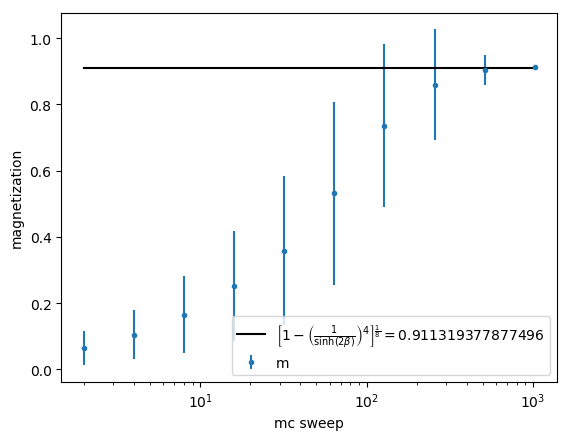

PyObject <matplotlib.legend.Legend object at 0x7f727290d0d0>

In [51]:
t,μ,σ=blockmean(res)
errorbar(t, μ, σ, fmt=".")
exact(β) = (1-sinh(2β)^-4)^(1/8)
plot(t,ones(length(t))*0.911319377877496,"-k")
plt.xscale(:log)
#plt.yscale(:log)
plt.xlabel("mc sweep")
plt.ylabel("magnetization")
plt.legend([L"\left[1-\left(\frac{1}{\sinh(2\beta)}\right)^4\right]^{\frac{1}{8}}="*"$(exact(β))","m"])

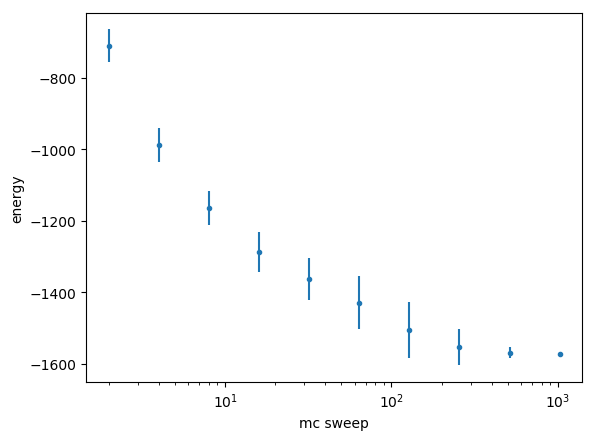

PyObject Text(24.0, 0.5, 'energy')

In [52]:
t,μ,σ=blockmean(res, field=:ene)
errorbar(t, μ, σ, fmt=".")
plt.xscale(:log)
#plt.yscale(:log)
plt.xlabel("mc sweep")
plt.ylabel("energy")

In [53]:
x=BitArray{1}(undef,L*nmeas) 
#res[1].conf[i] for i in 1:L
for i in 1:nmeas
   x[(i-1)*L+1 : i*L ]=res[1].conf[i] 
end
Δt=0
cor(x[1:end-Δt*L], x[1+Δt*L:end] )

1.0

In [54]:
mu,sigma=autocorrelation(res,2,field=:conf)

([1.0; 0.2873068499475936; 0.3127483835640792], [0.0; 0.1333880925318258; 0.12889646033856259])